In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wfp_food_prices_nga.csv to wfp_food_prices_nga.csv


In [5]:
df = pd.read_csv("/content/wfp_food_prices_nga.csv")

In [6]:
df

Date    State       LGA Local Market Name   latitude  longitude  \
0      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
1      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
2      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
3      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
4      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
...          ...      ...       ...               ...        ...        ...   
50944  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   
50945  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   
50946  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   
50947  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   
50948  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   

                    category   commodity name    unit  priceflag  pricetype  \
0         cereals and tubers            Maize      KG     actual  Wholesale   
1         cereals and tubers           Millet      KG     actual  Wholesale   
2         cereals and tubers  Rice (imported)      KG     actual  Wholesale   
3         cereals and tubers          Sorghum      KG     actual  Wholesale   
4            pulses and nuts    Beans (niebe)      KG     actual  Wholesale   
...                      ...              ...     ...        ...        ...   
50944           oil and fats  Oil (vegetable)       L  aggregate     Retail   
50945        pulses and nuts    Beans (white)  2.5 KG  aggregate     Retail   
50946        pulses and nuts       Groundnuts  2.5 KG  aggregate     Retail   
50947  vegetables and fruits           Onions  0.5 KG  aggregate     Retail   
50948  vegetables and fruits          Oranges   400 G  aggregate     Retail   

       price (NGN)  usdprice  
0           175.92    1.5398  
1           150.18    1.3145  
2           358.70    3.1396  
3           155.61    1.3620  
4           196.87    1.7231  
...            ...       ...  
50944      2000.00    2.5999  
50945      4875.00    6.3373  
50946      3462.50    4.5011  
50947       381.25    0.4956  
50948       250.00    0.3250  

[50949 rows x 13 columns]

In [7]:
# Data Inspection

In [8]:
# shape of the data
df.shape

(50949, 13)

In [9]:
df.columns

Index(['Date', 'State', 'LGA', 'Local Market Name', 'latitude', 'longitude',
       'category', 'commodity name', 'unit', 'priceflag', 'pricetype',
       'price (NGN)', 'usdprice'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50949 entries, 0 to 50948
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               50949 non-null  object 
 1   State              50949 non-null  object 
 2   LGA                50949 non-null  object 
 3   Local Market Name  50949 non-null  object 
 4   latitude           50949 non-null  float64
 5   longitude          50949 non-null  float64
 6   category           50949 non-null  object 
 7   commodity name     50949 non-null  object 
 8   unit               50949 non-null  object 
 9   priceflag          50949 non-null  object 
 10  pricetype          50949 non-null  object 
 11  price (NGN)        50949 non-null  float64
 12  usdprice           50949 non-null  float64
dtypes: float64(4), object(9)
memory usage: 5.1+ MB


In [11]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
df.describe()

latitude     longitude    price (NGN)      usdprice
count  50949.000000  50949.000000   50949.000000  50949.000000
mean      11.448942     10.442549    5458.884536     16.787907
std        1.644317      2.923376   11002.238024     32.203546
min        5.147640      3.401897       1.000000      0.002300
25%       11.280160      8.429120     200.000000      0.619000
50%       11.831100     11.499503     468.580000      1.317500
75%       12.493820     13.123314    4173.910000     18.537700
max       13.645000     13.913103  138000.000000    453.172200

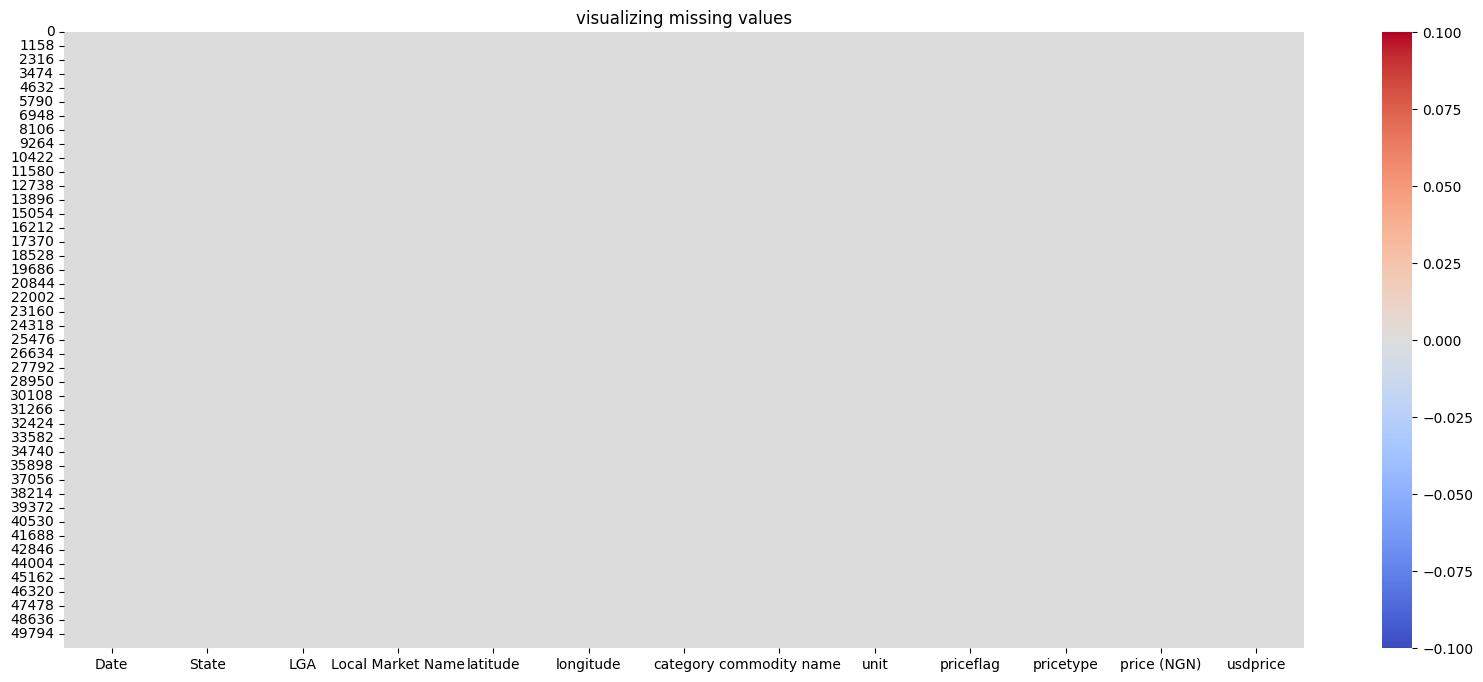

In [14]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

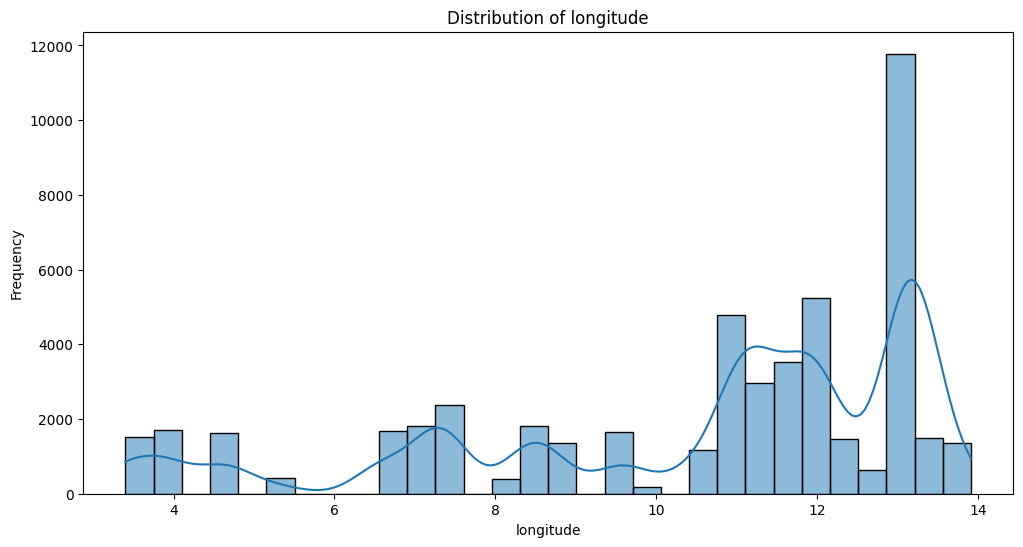

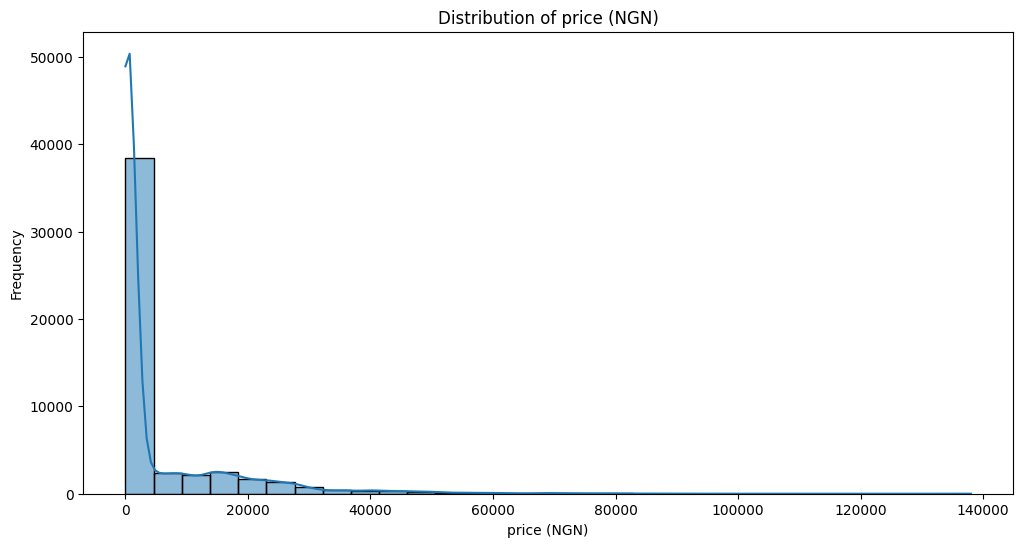

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distributions of numerical features
num_cols = [
    'latitude',	'longitude','price (NGN)','usdprice'
]

for feature in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# Unique values of cereals
df.category.value_counts()

category
cereals and tubers       24159
pulses and nuts           8609
vegetables and fruits     5963
meat, fish and eggs       4226
oil and fats              3025
non-food                  2011
miscellaneous food        1887
milk and dairy            1069
Name: count, dtype: int64

In [25]:
df['commodity name'].value_counts()

commodity name
Millet                         3036
Rice (imported)                2782
Rice (local)                   2585
Yam                            2516
Oil (palm)                     1924
Sorghum (white)                1705
Groundnuts (shelled)           1541
Maize (white)                  1528
Cowpeas (white)                1501
Gari (white)                   1438
Sorghum                        1427
Cowpeas (brown)                1419
Sorghum (brown)                1414
Maize (yellow)                 1413
Cassava meal (gari, yellow)    1297
Bread                          1253
Beans (white)                  1117
Oil (vegetable)                1101
Meat (beef)                    1101
Groundnuts                     1083
Beans (red)                    1080
Milk (powder)                  1069
Fish                           1052
Onions                         1051
Meat (goat)                    1050
Oranges                        1032
Eggs                           1023
Fuel (petrol-gasoline)         1017
Maize flour                     999
Watermelons                     998
Tomatoes                        998
Fuel (diesel)                   994
Sugar                           967
Bananas                         962
Spinach                         922
Salt                            920
Cowpeas                         853
Maize                           451
Rice (milled, local)            228
Yam (Abuja)                      47
Wheat                            40
Beans (niebe)                    15
Name: count, dtype: int64

In [33]:
df2 = df.copy()

In [39]:
'''target_commodities = ['Rice (local)','Rice (imported)',
                      'Rice (milled, local)','Millet',
                      'sorghum', 'Maize (white)','Maize (yellow)']
df2 = df2[df2['commodity name'].str.lower().isin(target_commodities)]'''
df_filtered = df2[df2['commodity name'].isin(['Rice (local)','Rice (imported)',
                      'Rice (milled, local)','Millet',
                      'Sorghum', 'Sorghum (white)', 'Sorghum (brown)','Maize (white)','Maize (yellow)'])]

In [40]:
df_filtered['commodity name'].value_counts()

commodity name
Millet                  3036
Rice (imported)         2782
Rice (local)            2585
Sorghum (white)         1705
Maize (white)           1528
Sorghum                 1427
Sorghum (brown)         1414
Maize (yellow)          1413
Rice (milled, local)     228
Name: count, dtype: int64

In [41]:
df_filtered.shape

(16118, 13)

In [42]:
df_filtered.category.value_counts()

category
cereals and tubers    16118
Name: count, dtype: int64

In [43]:
df_filtered

Date    State       LGA Local Market Name   latitude  longitude  \
1      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
2      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
3      1/15/2002  Katsina     Jibia       Jibia (CBM)  13.080000   7.240000   
5      1/15/2002   Sokoto      Gada      Illela (CBM)  13.645000   5.278000   
6      1/15/2002   Sokoto      Gada      Illela (CBM)  13.645000   5.278000   
...          ...      ...       ...               ...        ...        ...   
50920  6/15/2024     Yobe  Yunusari          Yunusari  13.149834  11.540236   
50921  6/15/2024     Yobe  Yunusari          Yunusari  13.149834  11.540236   
50935  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   
50936  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   
50937  6/15/2024     Yobe  Yusufari          Yusufari  13.062665  11.171371   

                 category   commodity name    unit  priceflag  pricetype  \
1      cereals and tubers           Millet      KG     actual  Wholesale   
2      cereals and tubers  Rice (imported)      KG     actual  Wholesale   
3      cereals and tubers          Sorghum      KG     actual  Wholesale   
5      cereals and tubers           Millet      KG     actual  Wholesale   
6      cereals and tubers  Rice (imported)      KG     actual  Wholesale   
...                   ...              ...     ...        ...        ...   
50920  cereals and tubers     Rice (local)  2.5 KG  aggregate     Retail   
50921  cereals and tubers          Sorghum  2.5 KG  aggregate     Retail   
50935  cereals and tubers           Millet  2.5 KG  aggregate     Retail   
50936  cereals and tubers     Rice (local)  2.5 KG  aggregate     Retail   
50937  cereals and tubers          Sorghum  2.5 KG  aggregate     Retail   

       price (NGN)  usdprice  
1           150.18    1.3145  
2           358.70    3.1396  
3           155.61    1.3620  
5           146.95    1.2862  
6           337.59    2.9549  
...            ...       ...  
50920      3387.50    4.4036  
50921      1762.50    2.2912  
50935      2000.00    2.5999  
50936      3325.00    4.3223  
50937      1812.50    2.3562  

[16118 rows x 13 columns]

<ipython-input-44-50b3eaa4e87b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commodity name', y='price (NGN)', data=df_filtered, palette='viridis')
<ipython-input-44-50b3eaa4e87b>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Commodities', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot


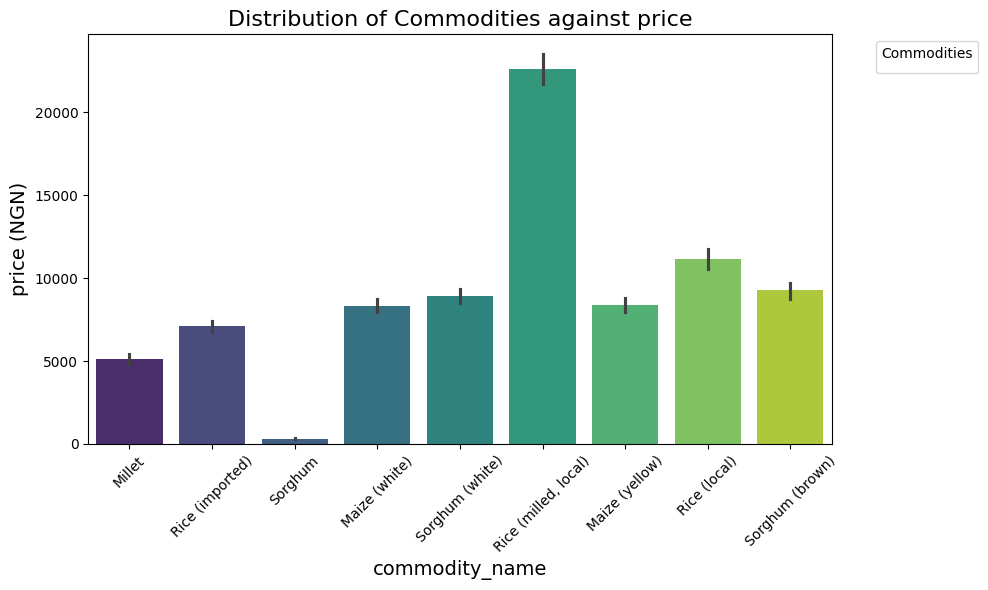

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='commodity name', y='price (NGN)', data=df_filtered, palette='viridis')

# Customize the plot
plt.title('Distribution of Commodities against price', fontsize=16)
plt.xlabel('commodity_name', fontsize=14)
plt.ylabel('price (NGN)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Commodities', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='commodity name', y='price (NGN)', data=df_filtered, palette='viridis')

# Customize the plot
plt.title('Distribution of Commodities against price', fontsize=16)
plt.xlabel('commodity_name', fontsize=14)
plt.ylabel('price (NGN)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Commodities', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<ipython-input-45-98242a126de7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='commodity name', y='price (NGN)', data=df_filtered, palette='viridis')
<ipython-input-45-98242a126de7>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Commodities', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot


In [51]:
df_filtered.isna().sum()

Date                 0
State                0
LGA                  0
Local Market Name    0
latitude             0
longitude            0
category             0
commodity name       0
unit                 0
priceflag            0
pricetype            0
price (NGN)          0
usdprice             0
dtype: int64

In [52]:
df_filtered.columns

Index(['Date', 'State', 'LGA', 'Local Market Name', 'latitude', 'longitude',
       'category', 'commodity name', 'unit', 'priceflag', 'pricetype',
       'price (NGN)', 'usdprice'],
      dtype='object')

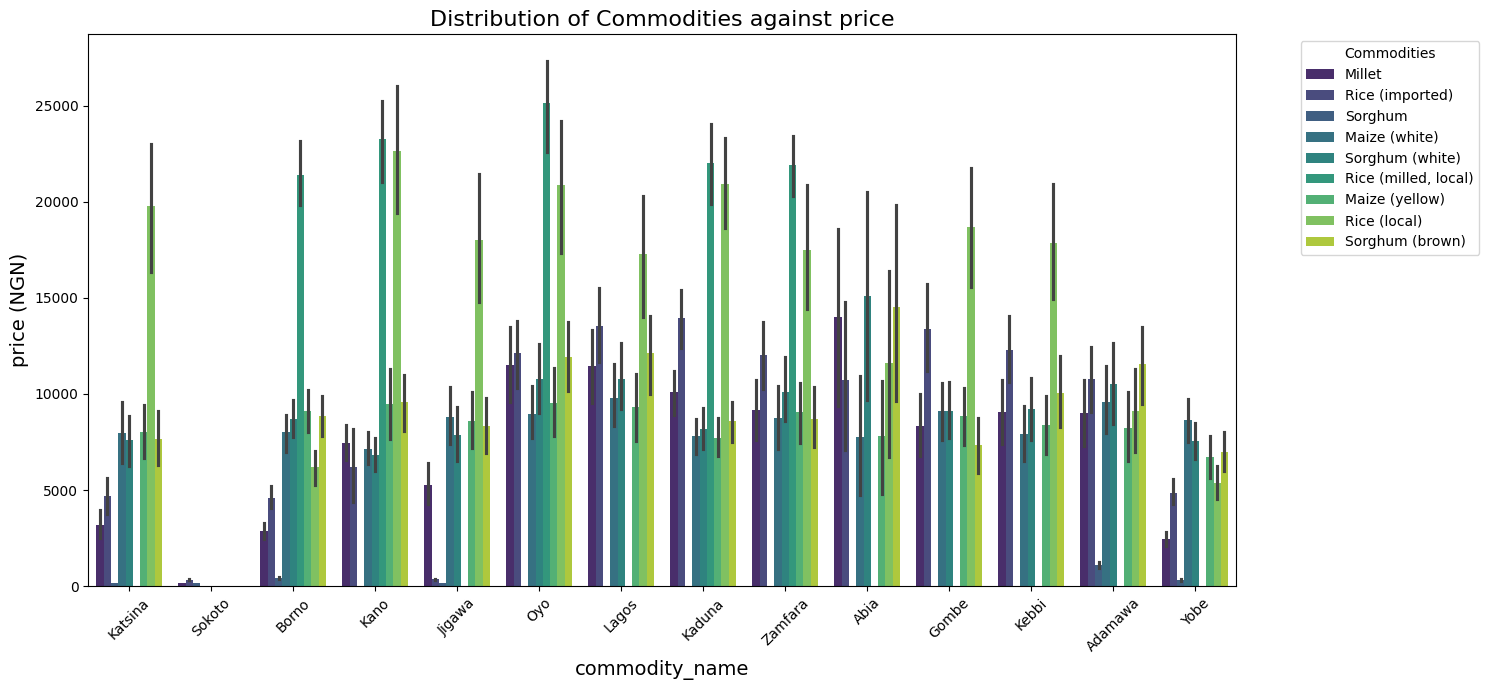

In [61]:
# Plotting
plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='price (NGN)', hue = 'commodity name',data=df_filtered, palette='viridis')

# Customize the plot
plt.title('Distribution of Commodities against price', fontsize=16)
plt.xlabel('commodity_name', fontsize=14)
plt.ylabel('price (NGN)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Commodities', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [59]:
df_filtered[df_filtered['commodity name'] == 'Millet']

Date    State       LGA  Local Market Name   latitude  longitude  \
1      1/15/2002  Katsina     Jibia        Jibia (CBM)  13.080000   7.240000   
5      1/15/2002   Sokoto      Gada       Illela (CBM)  13.645000   5.278000   
9      2/15/2002  Katsina     Jibia        Jibia (CBM)  13.080000   7.240000   
12     3/15/2002  Katsina     Jibia        Jibia (CBM)  13.080000   7.240000   
15     3/15/2002   Sokoto      Gada       Illela (CBM)  13.645000   5.278000   
...          ...      ...       ...                ...        ...        ...   
50830  6/15/2024     Yobe     Gujba  Gujba (Buni Yadi)  11.285202  11.999501   
50880  6/15/2024     Yobe   Machina    Machina Central  12.917630   9.900070   
50900  6/15/2024     Yobe  Potiskum           Potiskum  11.707240  11.082490   
50918  6/15/2024     Yobe  Yunusari           Yunusari  13.149834  11.540236   
50935  6/15/2024     Yobe  Yusufari           Yusufari  13.062665  11.171371   

                 category commodity name    unit  priceflag  pricetype  \
1      cereals and tubers         Millet      KG     actual  Wholesale   
5      cereals and tubers         Millet      KG     actual  Wholesale   
9      cereals and tubers         Millet      KG     actual  Wholesale   
12     cereals and tubers         Millet      KG     actual  Wholesale   
15     cereals and tubers         Millet      KG     actual  Wholesale   
...                   ...            ...     ...        ...        ...   
50830  cereals and tubers         Millet  2.5 KG  aggregate     Retail   
50880  cereals and tubers         Millet  2.5 KG  aggregate     Retail   
50900  cereals and tubers         Millet  2.5 KG  aggregate     Retail   
50918  cereals and tubers         Millet  2.5 KG  aggregate     Retail   
50935  cereals and tubers         Millet  2.5 KG  aggregate     Retail   

       price (NGN)  usdprice  
1           150.18    1.3145  
5           146.95    1.2862  
9           148.54    1.2399  
12          175.00    1.4957  
15          182.36    1.5586  
...            ...       ...  
50830      2026.09    2.6338  
50880      2262.50    2.9411  
50900      2093.33    2.7212  
50918      2000.00    2.5999  
50935      2000.00    2.5999  

[3036 rows x 13 columns]

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for each commodity
g = sns.FacetGrid(df_filtered, col='commodity name', col_wrap=3, height=5, aspect=1.5, sharey=False)

# Map a barplot to each facet
g.map(sns.barplot, 'State', 'price (NGN)', palette='viridis')

# Customize the plot

g.set_axis_labels('State', 'Price (NGN)')
g.set_titles('{col_name}')  # Set the title of each facet to the commodity name
g.set_xticklabels(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 